# Decision Tree and Random Forest Prediction for Heart Disease

https://archive.ics.uci.edu/ml/datasets/heart+disease

Only 14 attributes used:
1.  (age)
2.  (sex)
3.  (cp) - chest pain 
    - cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4.  (restbps) - resting blood presure (in mm Hg)
5.  (chol) - serum cholesterol in mg/dl
6.  (fbs) - fasting blood sugar
    - (1 = true; 0 = false)
7.  (restecg) - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.  (thalach) - maximum heart rate achieved
9.  (exang) - exercise induced angina
    - (1 = yes; 0 = no)
10. (oldpeak) - ST depression induced by exercise relative to rest
11. (slope) - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. (ca) - number of major vessels (0-3) colored by fluoroscopy
13. (thal) - this is short thalium heart scan
    - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (hd) - diagnosis of heart disease, the predicted attribute
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, classification_report
%matplotlib inline

In [41]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,header=None)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [43]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thatlach',
             'exang','oldpeak','slope','ca','thal','hd']

In [44]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thatlach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [45]:
df.hd.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: hd, dtype: int64

In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
restbp      0
chol        0
fbs         0
restecg     0
thatlach    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [47]:
df.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thatlach    float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [48]:
df.ca.value_counts(),df.thal.value_counts()

(0.0    176
 1.0     65
 2.0     38
 3.0     20
 ?        4
 Name: ca, dtype: int64,
 3.0    166
 7.0    117
 6.0     18
 ?        2
 Name: thal, dtype: int64)

In [49]:
df.drop(df[(df.ca=='?')|(df.thal=='?')].index, axis=0, inplace=True)

One-Hot Encoding

In [50]:
df_encoded = pd.get_dummies(df, columns=['cp','restecg','thal'],drop_first=True)

In [51]:
df_encoded.columns

Index(['age', 'sex', 'restbp', 'chol', 'fbs', 'thatlach', 'exang', 'oldpeak',
       'slope', 'ca', 'hd', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [52]:
df_encoded.hd.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [53]:
pd.options.mode.chained_assignment = None  # default='warn'
df_encoded.hd[df_encoded.hd>=1] = 1

In [54]:
df_encoded.hd.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [55]:
X = df_encoded.drop('hd', axis=1)
y = df_encoded.hd

Preliminary Classification Tree

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt_fit = clf_dt.fit(X_train, y_train)
y_pred = clf_dt_fit.predict(X_test)

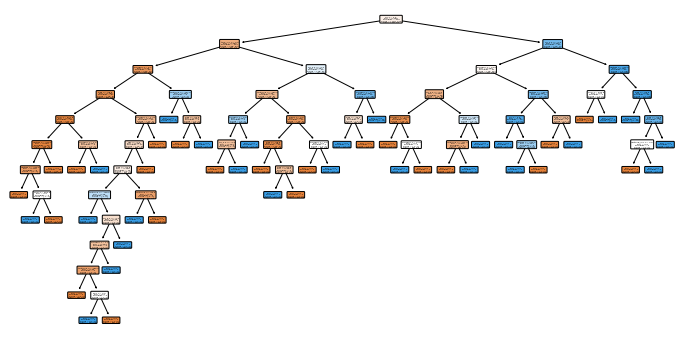

In [58]:
plt.figure(figsize=(12,6))
plot_tree(clf_dt_fit, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X.columns);

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        42
           1       0.68      0.82      0.74        33

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.76      0.75      0.75        75



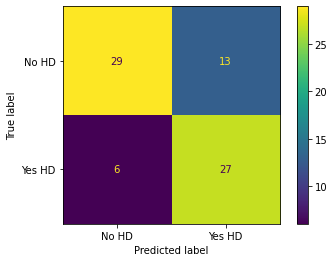

In [59]:
plot_confusion_matrix(clf_dt_fit, X_test, y_test, display_labels=["No HD", "Yes HD"])
print(classification_report(y_test, y_pred))

In [60]:

cstat = roc_auc_score(y_test, y_pred)
print('Preliminary c-stat:', round(cstat,3))

Preliminary c-stat: 0.754


Finding the best alpha for Cost Complexity Pruning. Optimal CCP helps our tree avoid overfitting. 

In [61]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [62]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

<AxesSubplot:xlabel='alpha'>

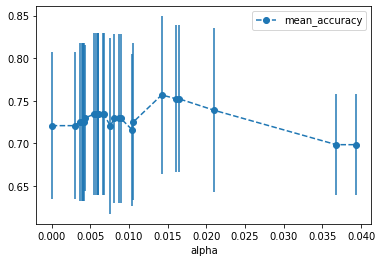

In [63]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [64]:
alpha_results[alpha_results.mean_accuracy == np.max(alpha_results.mean_accuracy)]

,alpha,mean_accuracy,std
21,0.014225,0.756869,0.09229


In [65]:
ideal_ccp_alpha = alpha_results[alpha_results.mean_accuracy == np.max(alpha_results.mean_accuracy)].alpha.values

Final Decision Tree

In [66]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned_fit = clf_dt_pruned.fit(X_train, y_train)
y_pred_pruned = clf_dt_pruned_fit.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



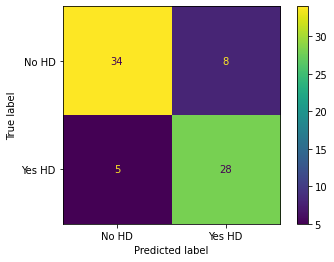

In [67]:
from sklearn.metrics import classification_report
plot_confusion_matrix(clf_dt_pruned_fit, X_test, y_test, display_labels=["No HD", "Yes HD"])
print(classification_report(y_test, y_pred_pruned))

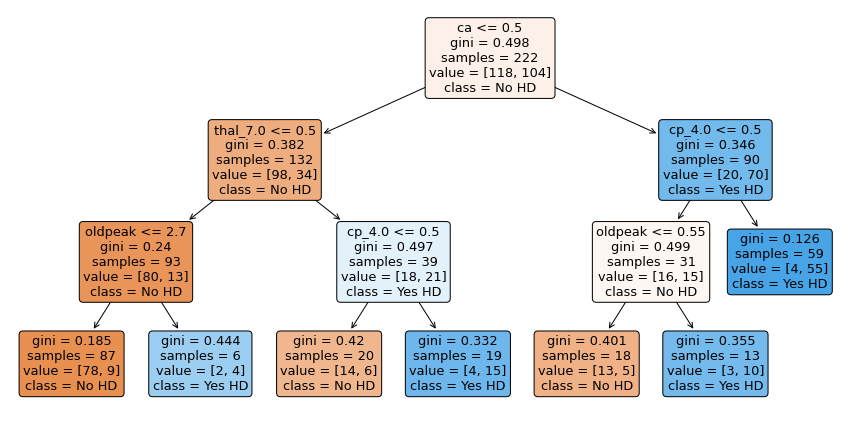

In [68]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned_fit, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X.columns);

In [69]:
cstat = roc_auc_score(y_test, y_pred_pruned)
print('Final tree c-stat:', round(cstat,3))

Final tree c-stat: 0.829


## Random Forest

Preliminiary Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [71]:
clf_rf = RandomForestClassifier(oob_score=True, random_state=42)
clf_rf_fit = clf_rf.fit(X_train, y_train)
y_pred = clf_rf_fit.predict(X_test)
oob_score = clf_rf_fit.oob_score_
cstat = roc_auc_score(y_test, y_pred)
print('Preliminary oob_score:', round(oob_score,3))
print('Preliminary rf c-stat:', round(cstat,3))

Preliminary oob_score: 0.77
Preliminary rf c-stat: 0.865


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.85      0.85      0.85        33

    accuracy                           0.87        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



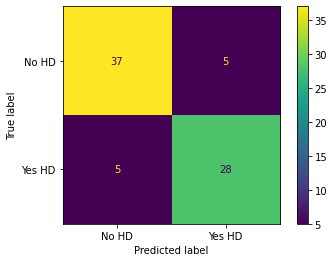

In [72]:
plot_confusion_matrix(clf_rf_fit, X_test, y_test, display_labels=["No HD", "Yes HD"])
print(classification_report(y_test, y_pred))

In [73]:
#Looking for strong correlation with the predictor variable.
df_encoded.corr()['hd'].sort_values(ascending=False)

hd             1.000000
cp_4.0         0.507035
thal_7.0       0.484657
oldpeak        0.424052
exang          0.421355
slope          0.333049
sex            0.278467
age            0.227075
restecg_2.0    0.157440
restbp         0.153490
thal_6.0       0.104651
chol           0.080285
restecg_1.0    0.067672
fbs            0.003167
cp_2.0        -0.247535
cp_3.0        -0.305345
thatlach      -0.423817
Name: hd, dtype: float64

<AxesSubplot:>

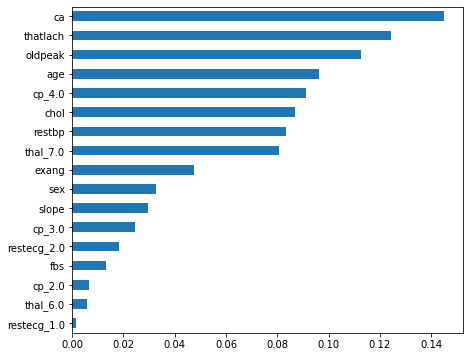

In [74]:
feature_importances = pd.Series(clf_rf_fit.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

In [75]:
#RFE (Recursive Feature Elimination)
rfe = RFE(clf_rf, n_features_to_select=15)
rfe = rfe.fit(X, y)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 2), rfe.ranking_), rfe.support_ , X.columns)))


Features sorted by their rank:
[(1, True, 'age'), (1, True, 'ca'), (1, True, 'chol'), (1, True, 'cp_2.0'), (1, True, 'cp_3.0'), (1, True, 'cp_4.0'), (1, True, 'exang'), (1, True, 'fbs'), (1, True, 'oldpeak'), (1, True, 'restbp'), (1, True, 'restecg_2.0'), (1, True, 'sex'), (1, True, 'slope'), (1, True, 'thal_7.0'), (1, True, 'thatlach'), (2, False, 'thal_6.0'), (3, False, 'restecg_1.0')]


##### Correlation
We are looking for a strong correlation for the predictor variable compared to all other features. The correlation table does not show strong correlation, or else we need to drop the feature. The reason for ommiting potential features with strong correlation is because that feature will dominate many of the decision trees(via similar tree roots) generated in the Random Forest. 

##### RFE 
From the RFE analysis, we will keep the lowest values while True. We will omit the features 'restecg_1.0'.

In [76]:
X.drop(['restecg_1.0'], axis=1, inplace=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we will test find the optimimal perfomance parameters.

In [41]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1.83 s ± 279 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42) #njobs all run in parrallel, -1 is engage all processors
model.fit(X, y)

1.67 s ± 345 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
n_jobs = -1 #chosen for the fastest performance

<AxesSubplot:>

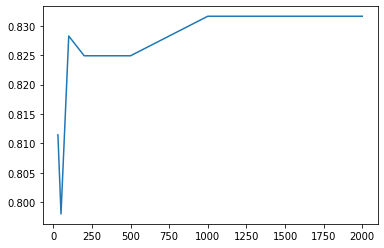

In [75]:
results = []
n_estimators_options = [30,50,100,200,500,1000,2000]

for trees in n_estimators_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=n_jobs, random_state=42)
    model.fit(X,y)
    oob_score = model.oob_score_
    results.append(oob_score)
    
pd.Series(results, n_estimators_options).plot()

In [76]:
trees = 1000 #chosen for peak oob score

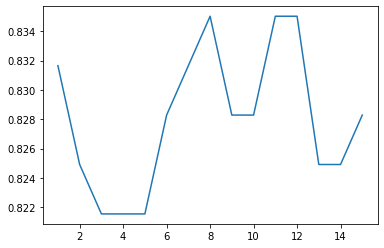

In [77]:
results = []
min_samples_leaf_options = [1,2,3,5,5,6,7,8,9,10,11,12,13,14,15]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=n_jobs, random_state=42, min_samples_leaf=min_samples)
    model.fit(X,y)
    oob_score = model.oob_score_
    results.append(oob_score)
    
pd.Series(results, min_samples_leaf_options).plot();

In [86]:
leaves = 8 #chosen for peak accuracy

Final Random Forest

In [87]:
clf_rf = RandomForestClassifier(trees, oob_score=True, n_jobs=n_jobs, random_state=42, min_samples_leaf=leaves)
clf_rf_fit = clf_rf.fit(X_train, y_train)
y_pred = clf_rf_fit.predict(X_test)
oob_score = clf_rf_fit.oob_score_
cstat = roc_auc_score(y_test, y_pred)

print('Final rf oob_score:', round(oob_score,3))
print('Final rf c-stat:', round(cstat,3))

Final rf oob_score: 0.824
Final rf c-stat: 0.85


              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.84      0.82      0.83        33

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



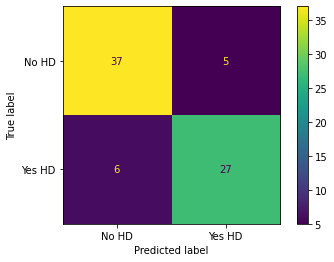

In [88]:
plot_confusion_matrix(clf_rf_fit, X_test, y_test, display_labels=["No HD", "Yes HD"])
print(classification_report(y_test, y_pred))

The Random Forest ensemble compared to an optimized decision tree, can predicted a c-stat 0.85 to 0.83, a 0.02 improvement. Also, the oob score is improved upon feature and parameter selection, meaning we avoided overfitting.  